# Problem Statement :

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

# Aim :

To create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# To import the required dataset

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To display all the columns at once

pd.set_option('display.max_columns',None)

In [3]:
# Getting the dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

This is the dataset we have and our target is "fraud_reported".

# Exploratory Data Analysis :

In [4]:
# Checking shape of the dataset

df.shape

(1000, 40)

There are 1000 rows and 40 columns in our dataset.

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
# Checking datatype of the dataset

df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The data set has int and object datatype features mostly, and only 2 features are float datatype.

In [7]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

As we can see here, all the features, except one "_c39", do not have any null values.

And memory used by the dataset is 312.6+ KB

Hence we drop "_c39" since it contains only null values.

In [8]:
df.drop(['_c39'],axis=1,inplace=True)

In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

_Successfully dropped._

In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

We can also visualize and check :

In [11]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

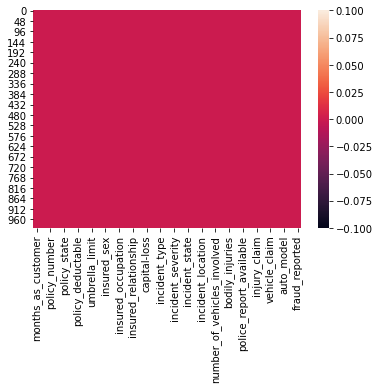

In [12]:
sns.heatmap(df.isnull())

There are no more null values int the dataset.

In [13]:
#Checking for unique values in each feature

df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

There are some categorical as well as numerical data too.

Our target is __fraud_reported__, which is categorical and hence we will use classification models.

In [14]:
# To check the value count of eaach feature 

for i in df.columns:
        print(df[i].value_counts())
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
296960    1
206213    1
853360    1
521585    1
290162    1
         ..
276804    1
426708    1
963285    1
789208    1
116735    1
Name: policy_number, Length: 1000, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
01-01-2006    3
05-08-1992    3
28-04-1992    3
09-08-2004    2
28-12-19

__Observations__ :

"policy_number" is having all 1000 unique numbers, assigned to each customers. It won't be of any help for the machine learning models and hence can be dropped.

In [15]:
df.drop(['policy_number'],axis=1,inplace=True)

"insured_zip" is also some code given to each customer. We can drop it

In [17]:
df.drop(['insured_zip'],axis=1,inplace=True)

"incident_location" also has 1000 unique values. We can drop it.

In [18]:
df.drop(['incident_location'],axis=1,inplace=True)

We can also observe that, some features __"collision_type", "property_damage", "police_report_available" has "?"__ values. These can be replaced with the most frequently occuring value in that feature.

In [19]:
df['collision_type'] = df.collision_type.str.replace('?', df['collision_type'].mode()[0])
df['property_damage'] = df.property_damage.str.replace('?', "NO")
df['police_report_available'] = df.police_report_available.str.replace('?', "NO")

In [20]:
df.collision_type.value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [21]:
df.property_damage.value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [22]:
df.police_report_available.value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

_Successfully replaced._

__Now we need to extract the date values from "policy_bind_date" and "incident_date".__

In [25]:
# Extracting only Day from policy_bind_date column
df['policy_bind_day']=pd.to_datetime(df.policy_bind_date).dt.day

# Extracting only month from policy_bind_date column
df['policy_bind_month'] = pd.to_datetime(df.policy_bind_date).dt.month

# Extracting only year from policy_bind_date column
df['policy_bind_year'] = pd.to_datetime(df.policy_bind_date).dt.year

In [26]:
df.head(1)

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   

   policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0               1000                1406.91               0        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    25-01-2015   

              incident_type  collision_type incident_severity  \
0  Single Vehicle Collision  Side Collision      Major Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   

   policy_bind_year  
0              2014

_3 new columns are added to the dataset. Hence we can drop "policy_bind_date" column._

In [27]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

In [28]:
df.head(1)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   

   capital-loss incident_date             incident_type  collision_type  \
0             0    25-01-2015  Single Vehicle Collision  Side Collision   

  incident_severity authorities_contacted incident_state incident_city  \
0      Major Damage                Police             SC      Columbus   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   

   policy_bind_year  
0              2014

_Successfully dropped._

In [29]:
# Extracting only Day from incident_date column
df['incident_day']=pd.to_datetime(df.incident_date).dt.day

# Extracting only month from incident_date column
df['incident_month'] = pd.to_datetime(df.incident_date).dt.month

# Extracting only year from incident_date column
df['incident_year'] = pd.to_datetime(df.incident_date).dt.year

In [30]:
df.head(1)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   

   capital-loss incident_date             incident_type  collision_type  \
0             0    25-01-2015  Single Vehicle Collision  Side Collision   

  incident_severity authorities_contacted incident_state incident_city  \
0      Major Damage                Police             SC      Columbus   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   

   policy_bind_year  incident_day  incident_month  incident_year  
0              2014            25               1           2015

3 new columns are added to the dataset. Hence we can drop "incident_date" column.

In [31]:
df.drop(['incident_date'],axis=1,inplace=True)

In [32]:
df.head(1)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   

   capital-loss             incident_type  collision_type incident_severity  \
0             0  Single Vehicle Collision  Side Collision      Major Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   

   policy_bind_year  incident_day  incident_month  incident_year  
0              2014            25               1           2015

_Successfully dropped._

In [33]:
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   
1       2007              Y               27                  6   
2       2007              N                9                  6   
3       2014              Y               25                  5   
4       2009              N                6                  6   

   policy_bind_year  incident_day  incident_month  i

In [35]:
df.drop(['policy_csl'],axis=1,inplace=True)

In [37]:
df.incident_year

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
995    2015
996    2015
997    2015
998    2015
999    2015
Name: incident_year, Length: 1000, dtype: int64

This feature only has 2015 value. Hence can be dropped.

In [38]:
df.drop(['incident_year'],axis=1,inplace=True)

In [39]:
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   
1       2007              Y               27                  6   
2       2007              N                9                  6   
3       2014              Y               25                  5   
4       2009              N                6                  6   

   policy_bind_year  incident_day  incident_month  
0              2014            25               1  
1             

# Exploring output variable :

In [40]:
df.fraud_reported.unique()

array(['Y', 'N'], dtype=object)

In [41]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

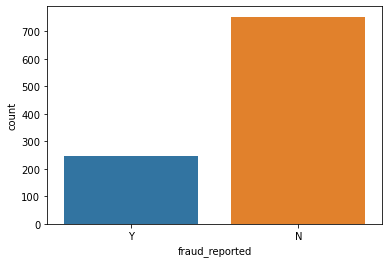

In [43]:
sns.countplot(x='fraud_reported', data=df)

__<font color=orange>Here we can observe highly imbalanced data in our target. This will be balanced using  SMOTE technique in the later part of the project.</font>__

# Univariate Analysis :

In [44]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

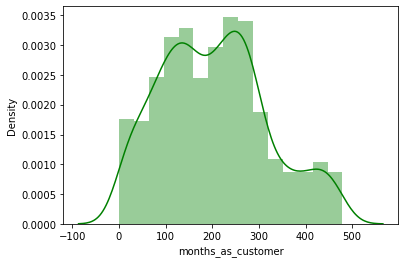

In [46]:
sns.distplot(df['months_as_customer'], color='green')

Most people were customers with the insurance company for around 250 to 300 months. The data is not normally distributed, neither it has skewness.

<AxesSubplot:xlabel='age', ylabel='Density'>

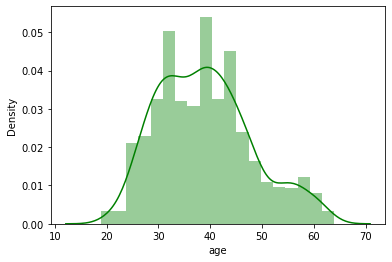

In [49]:
sns.distplot(df['age'], color='green')

People around the age of 40, mostly, are prefering insurance claims. The data is not normally distributed, neither it has skewness.

<AxesSubplot:xlabel='policy_state', ylabel='count'>

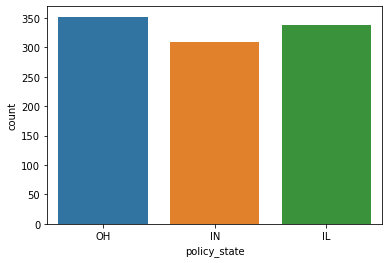

In [50]:
sns.countplot(x="policy_state",data=df)

Policy state OH is more popular and IN has thr least count.

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

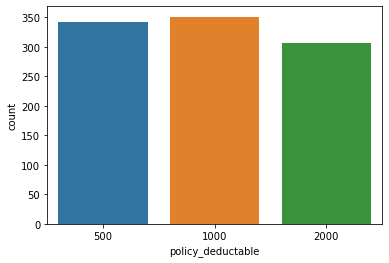

In [51]:
sns.countplot(x="policy_deductable",data=df)

Maximum policy deductable is 1000.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

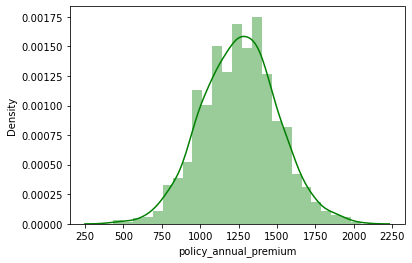

In [52]:
sns.distplot(df['policy_annual_premium'], color='green')

Maximum policy annual premium is around 1250. The data has normal distribution and is not skewed.

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

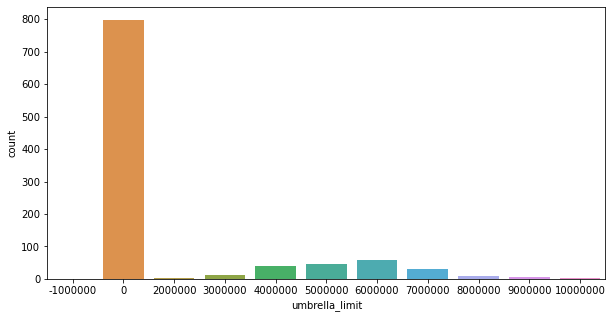

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x="umbrella_limit",data=df)

Most of the data in this feature is zero. However the highest umbrella limit is 6000000.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

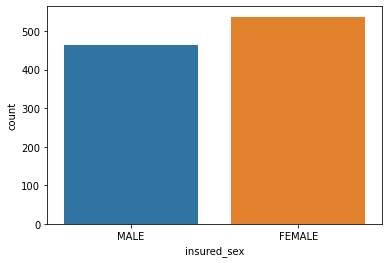

In [56]:
sns.countplot(x="insured_sex",data=df)

Mostly females are applying for insurance claims.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

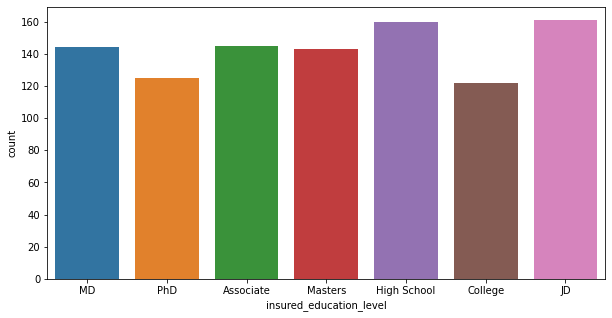

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x="insured_education_level",data=df)

Most of the people has high school and JD qualification.

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

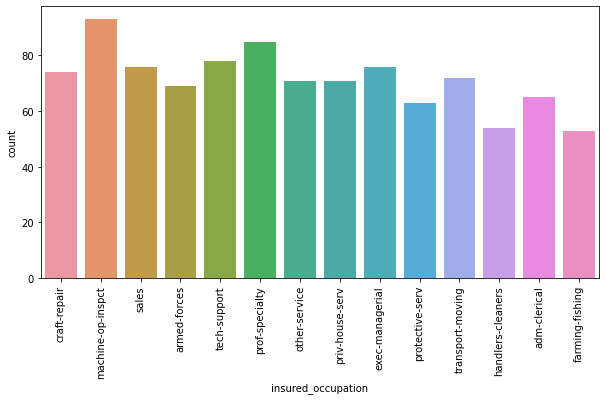

In [58]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="insured_occupation",data=df)

Most of the people are machine op inspect in occupation.

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

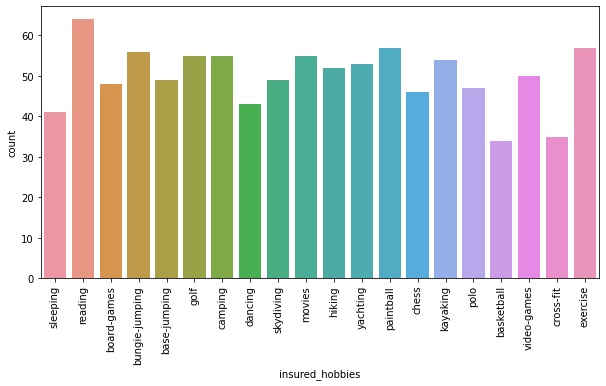

In [59]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="insured_hobbies",data=df)

Reading and exercise are more popular in insured hobbies.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

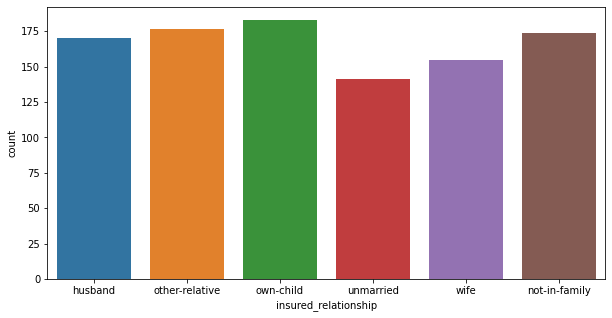

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x="insured_relationship",data=df)

Insured relationship with the person is mostly for their own child.

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

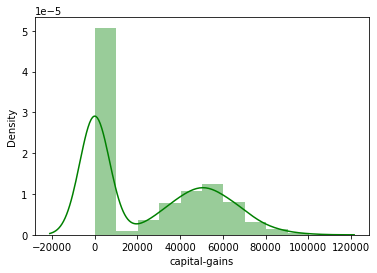

In [61]:
sns.distplot(df['capital-gains'], color='green')

The feature has slight skewness, it is right skewed.

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

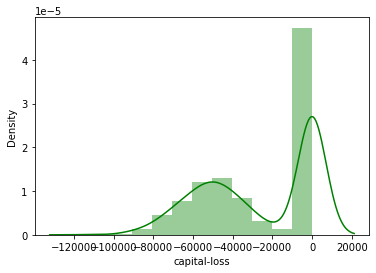

In [64]:
sns.distplot(df['capital-loss'], color='green')

capital loss has left skewness, and neither normally distributed.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

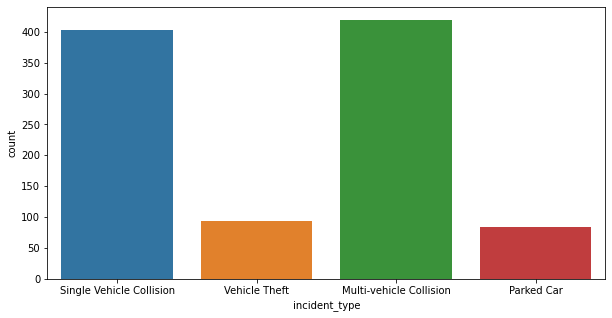

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x="incident_type",data=df)

Insurance claiming is done mostly for multi vehicle collision, followed by single vehicle collision.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

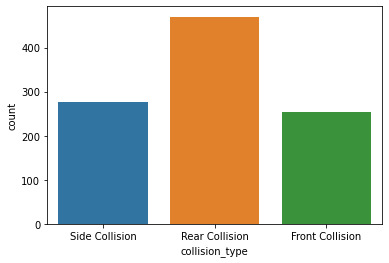

In [67]:
sns.countplot(x="collision_type",data=df)

Most of the vehicle collision is due to rear collision.

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

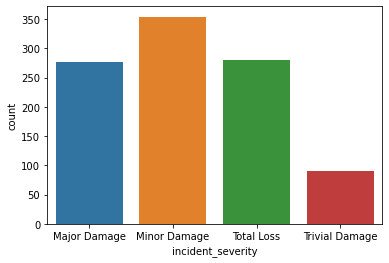

In [68]:
sns.countplot(x="incident_severity",data=df)

Most of the incidents have minor damage.

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

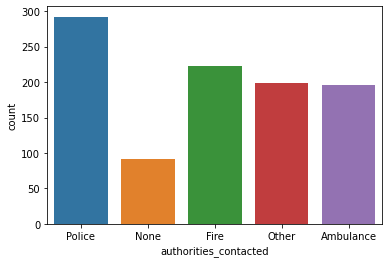

In [69]:
sns.countplot(x="authorities_contacted",data=df)

After any incidents, people always contacted the police mostly, or else fire station or the ambulance.

<AxesSubplot:xlabel='incident_state', ylabel='count'>

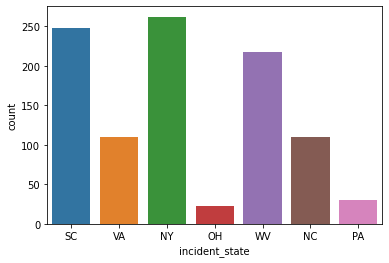

In [70]:
sns.countplot(x="incident_state",data=df)

NY and SC has high records of incidents, and OH and PA the least records.

<AxesSubplot:xlabel='incident_city', ylabel='count'>

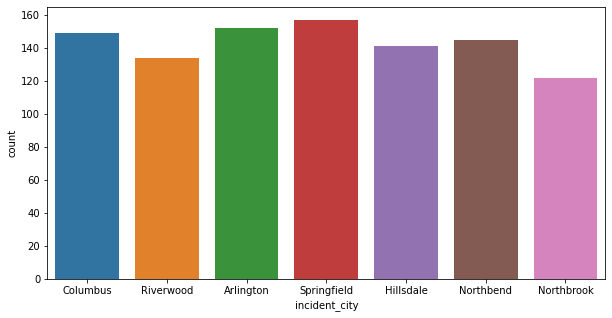

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x="incident_city",data=df)

All of the cities has almost equal records for incidents, but the highest is Springfield.

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

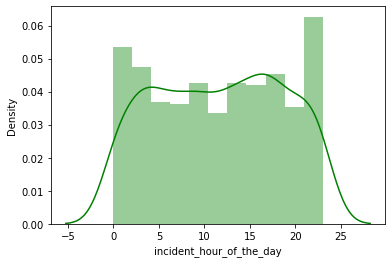

In [73]:
sns.distplot(df['incident_hour_of_the_day'], color='green')

The data is normally distributed and has no skewness.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

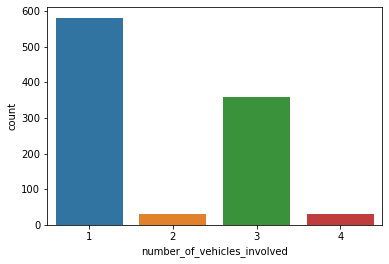

In [74]:
sns.countplot(x="number_of_vehicles_involved",data=df)

Usually one of the vehicle is the main cause of the incidents.

<AxesSubplot:xlabel='property_damage', ylabel='count'>

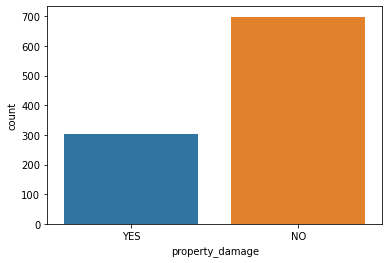

In [75]:
sns.countplot(x="property_damage",data=df)

There is record of less property damage during the incidents.

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

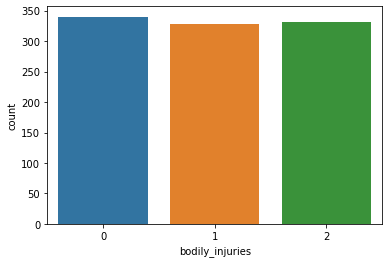

In [76]:
sns.countplot(x="bodily_injuries",data=df)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

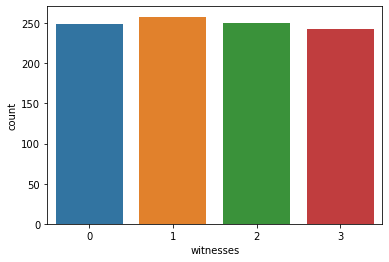

In [77]:
sns.countplot(x="witnesses",data=df)

There were witnesses to the incidents always.

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

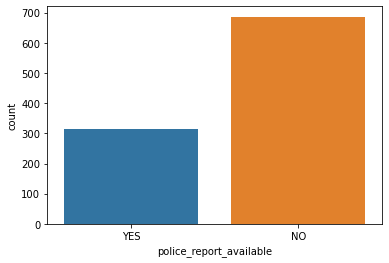

In [78]:
sns.countplot(x="police_report_available",data=df)

Police report is not available for most of the incidents.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

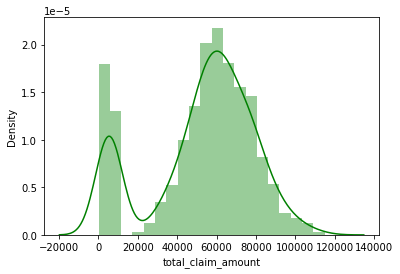

In [79]:
sns.distplot(df['total_claim_amount'], color='green')

The total claim amount ranges from 60k to 70k mostly.

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

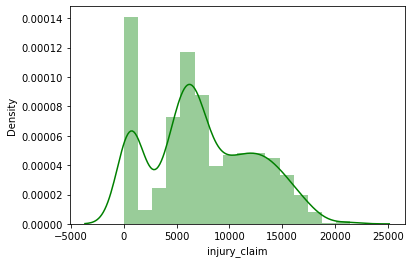

In [80]:
sns.distplot(df['injury_claim'], color='green')

Injury claim ranges from 5000 to 7000. And the data has slight right skewness.

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

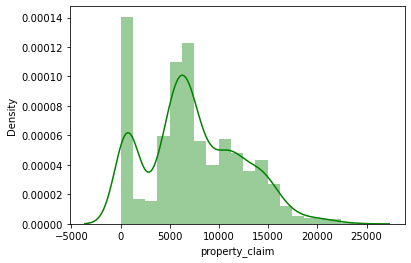

In [81]:
sns.distplot(df['property_claim'], color='green')

Property claim amount ranges from 5000 to 7000. And the data has slight right skewness.

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

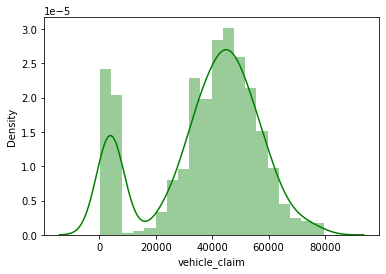

In [82]:
sns.distplot(df['vehicle_claim'], color='green')

Amount for vehicle claim is around 40k.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

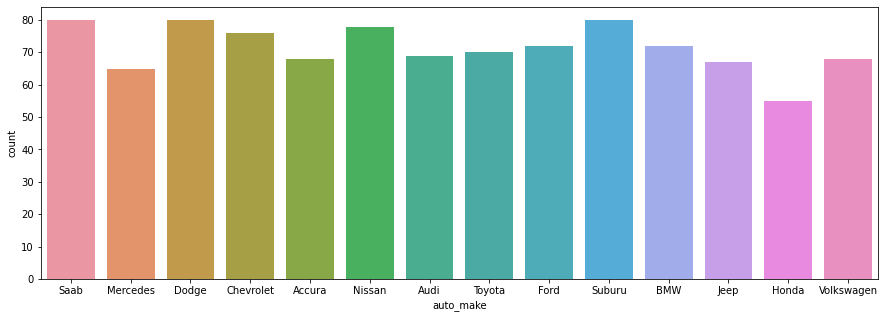

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(x="auto_make",data=df)

Some of the highly produced automobiles are Saab, Dodge, suburu.

<AxesSubplot:xlabel='auto_model', ylabel='count'>

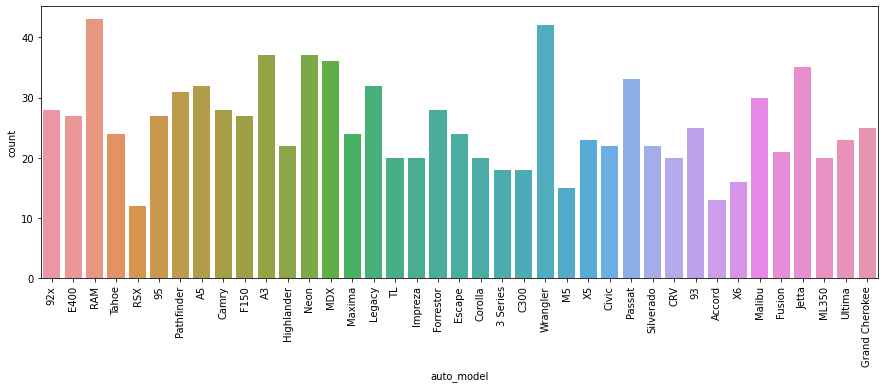

In [87]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x="auto_model",data=df)

Highest produced models are RAM and Wrangler.

# Bivariate Analysis :

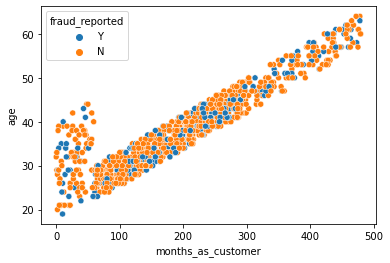

In [94]:
sns.scatterplot(df['months_as_customer'],df['age'],hue=df['fraud_reported'])

age and months as customer are positively related. As age increases, months also increases, and fraud reported is also less in this case.

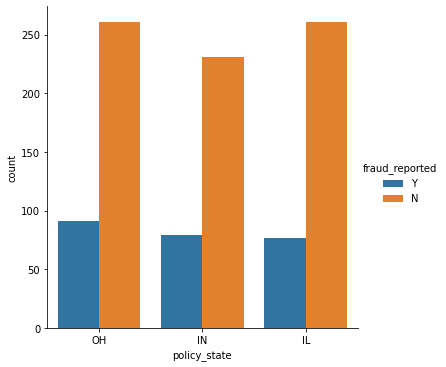

In [97]:
sns.factorplot('policy_state',kind='count',data=df,hue='fraud_reported')

fraud reported is more in OH state.

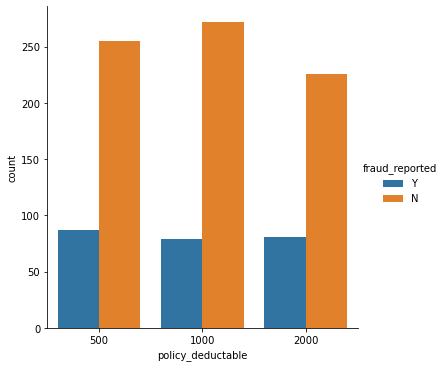

In [98]:
sns.factorplot('policy_deductable',kind='count',data=df,hue='fraud_reported')

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

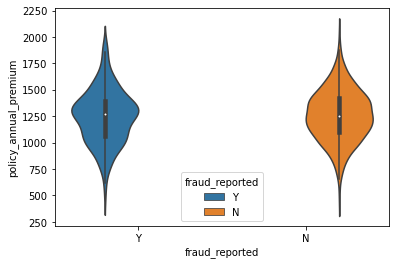

In [99]:
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data=df,hue="fraud_reported")

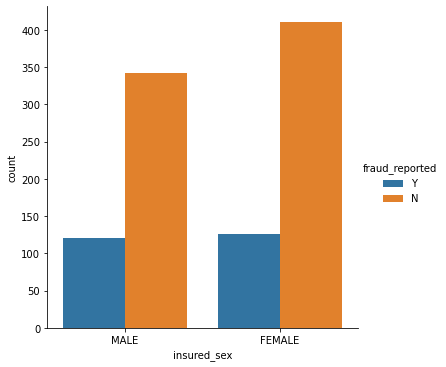

In [104]:
sns.factorplot('insured_sex',kind='count',data=df,hue='fraud_reported')

Fraud reported less in the case of females.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

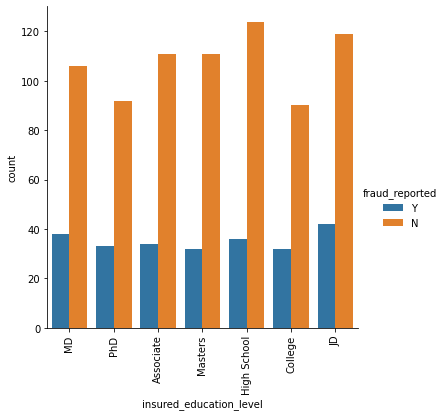

In [110]:
sns.factorplot('insured_education_level',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

People who have completed JD level education has more fraud reported.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

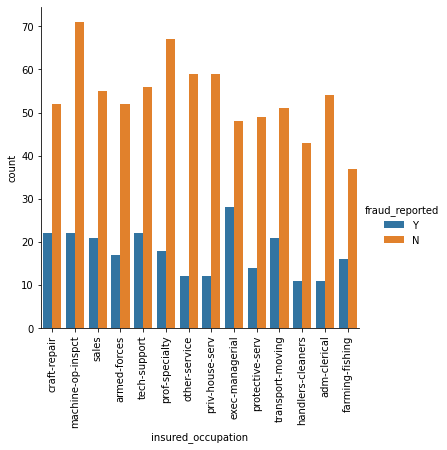

In [111]:
sns.factorplot('insured_occupation',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Fraud reported is highest for people working as exec managerial.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

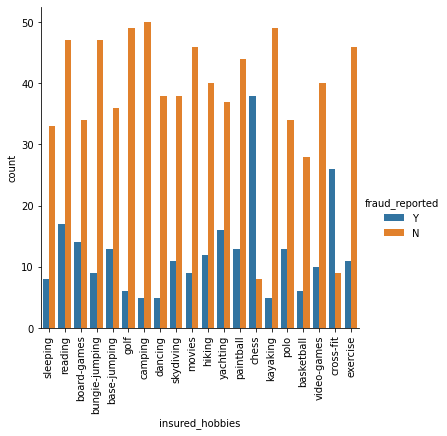

In [112]:
sns.factorplot('insured_hobbies',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Highest fraud reported by the people playing chess.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

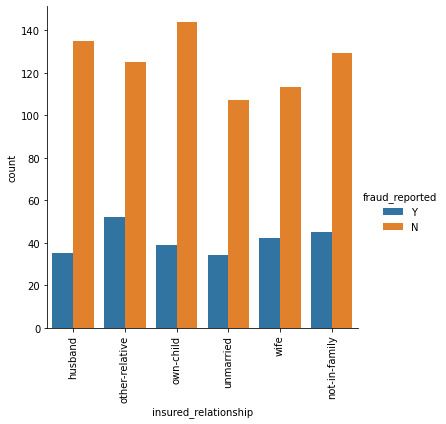

In [113]:
sns.factorplot('insured_relationship',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Highest fraud cases are reported by the other relatives.

<AxesSubplot:xlabel='capital-gains', ylabel='fraud_reported'>

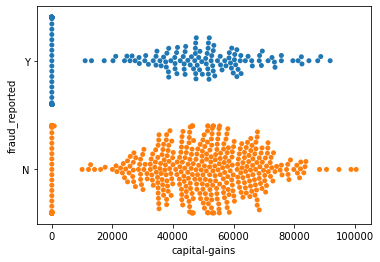

In [117]:
sns.swarmplot(x='capital-gains',y='fraud_reported',data=df)

<AxesSubplot:xlabel='capital-loss', ylabel='fraud_reported'>

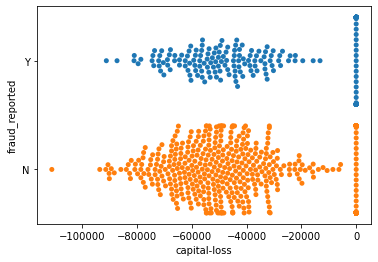

In [118]:
sns.swarmplot(x='capital-loss',y='fraud_reported',data=df)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

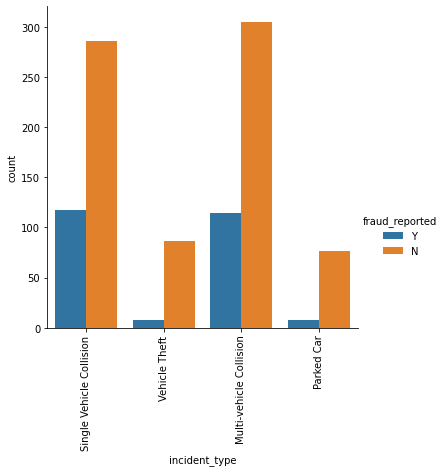

In [119]:
sns.factorplot('incident_type',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Fraud is mostly reported in the cases of single and multiple vehicle collision.

(array([0, 1, 2]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Rear Collision'),
  Text(2, 0, 'Front Collision')])

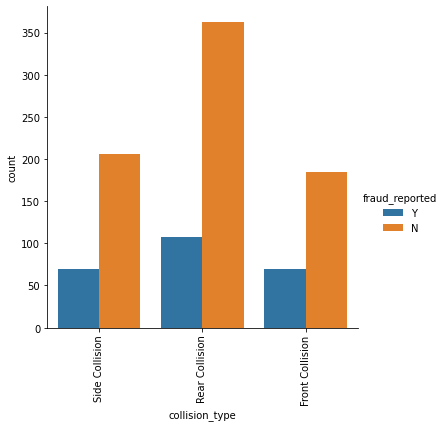

In [120]:
sns.factorplot('collision_type',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Fraud is mostly reported in the cases of rear collision of the vehicles.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Major Damage'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Total Loss'),
  Text(3, 0, 'Trivial Damage')])

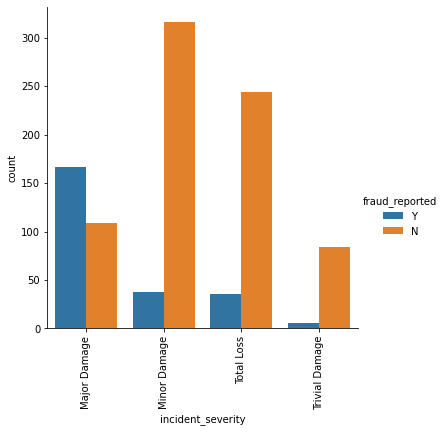

In [121]:
sns.factorplot('incident_severity',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Highest fraud is reported for major damages during the incidents.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

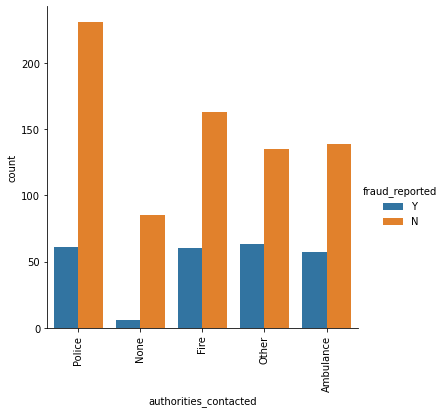

In [122]:
sns.factorplot('authorities_contacted',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Fraud reported is equal for all the authorities except None.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

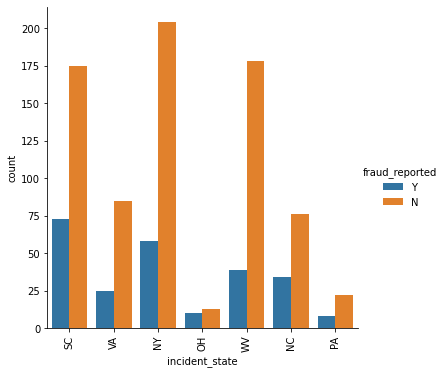

In [123]:
sns.factorplot('incident_state',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Highest fraud is reported in the state of SC.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

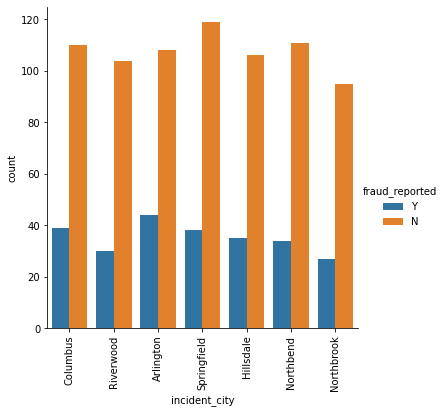

In [124]:
sns.factorplot('incident_city',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Highest fraud is reported in the city of Arlington.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

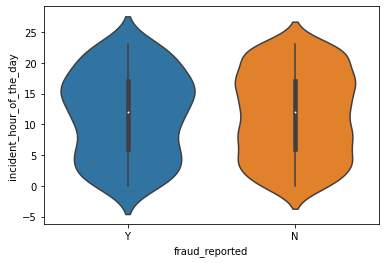

In [125]:
sns.violinplot(x='fraud_reported',y='incident_hour_of_the_day',data=df)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

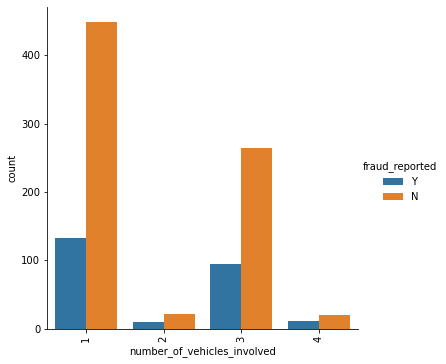

In [126]:
sns.factorplot('number_of_vehicles_involved',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Mostly one vehicle is responsible for the frauds.

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

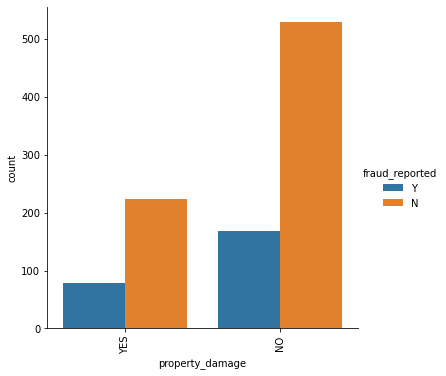

In [127]:
sns.factorplot('property_damage',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

In the most of the reported fraud cases there is no property damage.

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

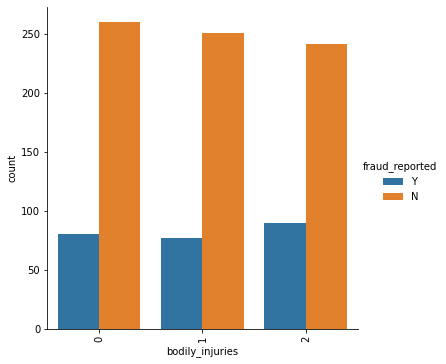

In [128]:
sns.factorplot('bodily_injuries',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

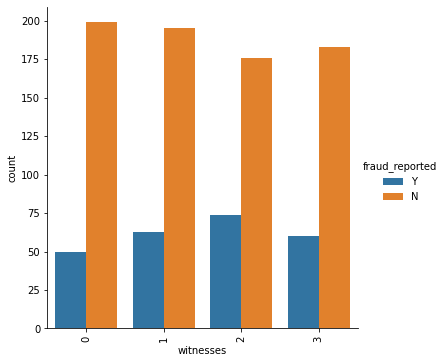

In [129]:
sns.factorplot('witnesses',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

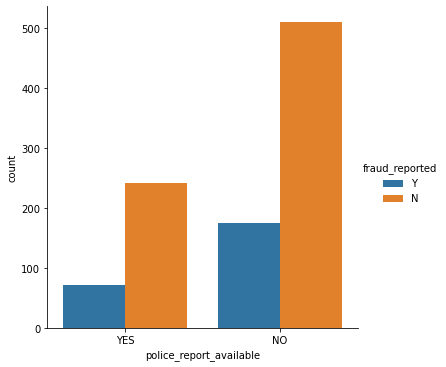

In [131]:
sns.factorplot('police_report_available',kind='count',data=df,hue='fraud_reported')


Fraud reported is highest when there is not police report available.

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

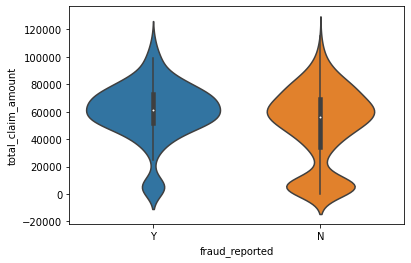

In [132]:
sns.violinplot(x='fraud_reported',y='total_claim_amount',data=df)

Fraud reported is high when total claim amount is around 60K.

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

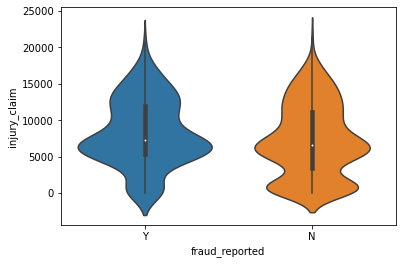

In [133]:
sns.violinplot(x='fraud_reported',y='injury_claim',data=df)

Fraud reported is more when injury claim is around 5000 to 6000.

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

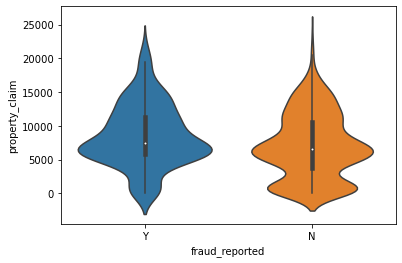

In [134]:
sns.violinplot(x='fraud_reported',y='property_claim',data=df)

Fraud reported is more when property claim is around 5000 to 6000.

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

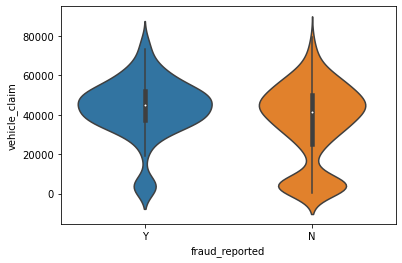

In [135]:
sns.violinplot(x='fraud_reported',y='vehicle_claim',data=df)

Fraud reported is more when vehicle claim is around 40K to 60K.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

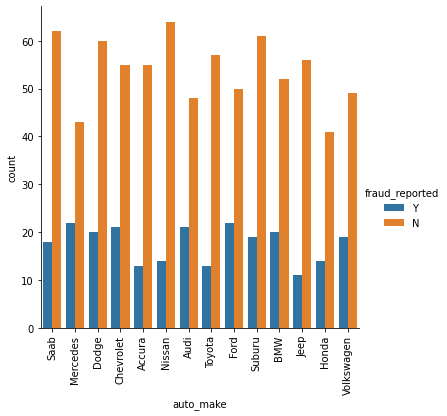

In [137]:
sns.factorplot('auto_make',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Fraud reported is almost equal for all the automobiles.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

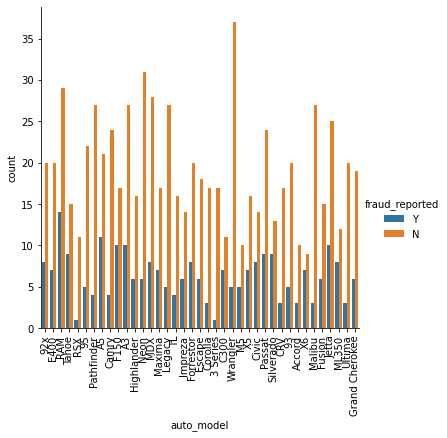

In [138]:
sns.factorplot('auto_model',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Highest fraud reported for the RAM model.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

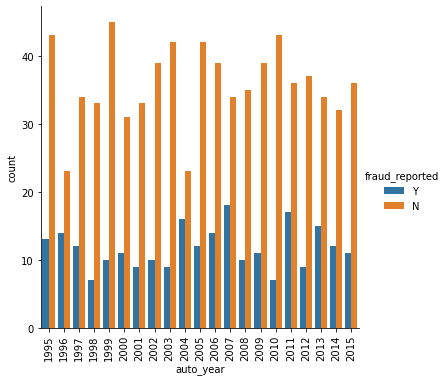

In [139]:
sns.factorplot('auto_year',kind='count',data=df,hue='fraud_reported')
plt.xticks(rotation=90)

Highest fraud was reported for automobiles manufactured in the year 2007.

# Multivariate Analysis :

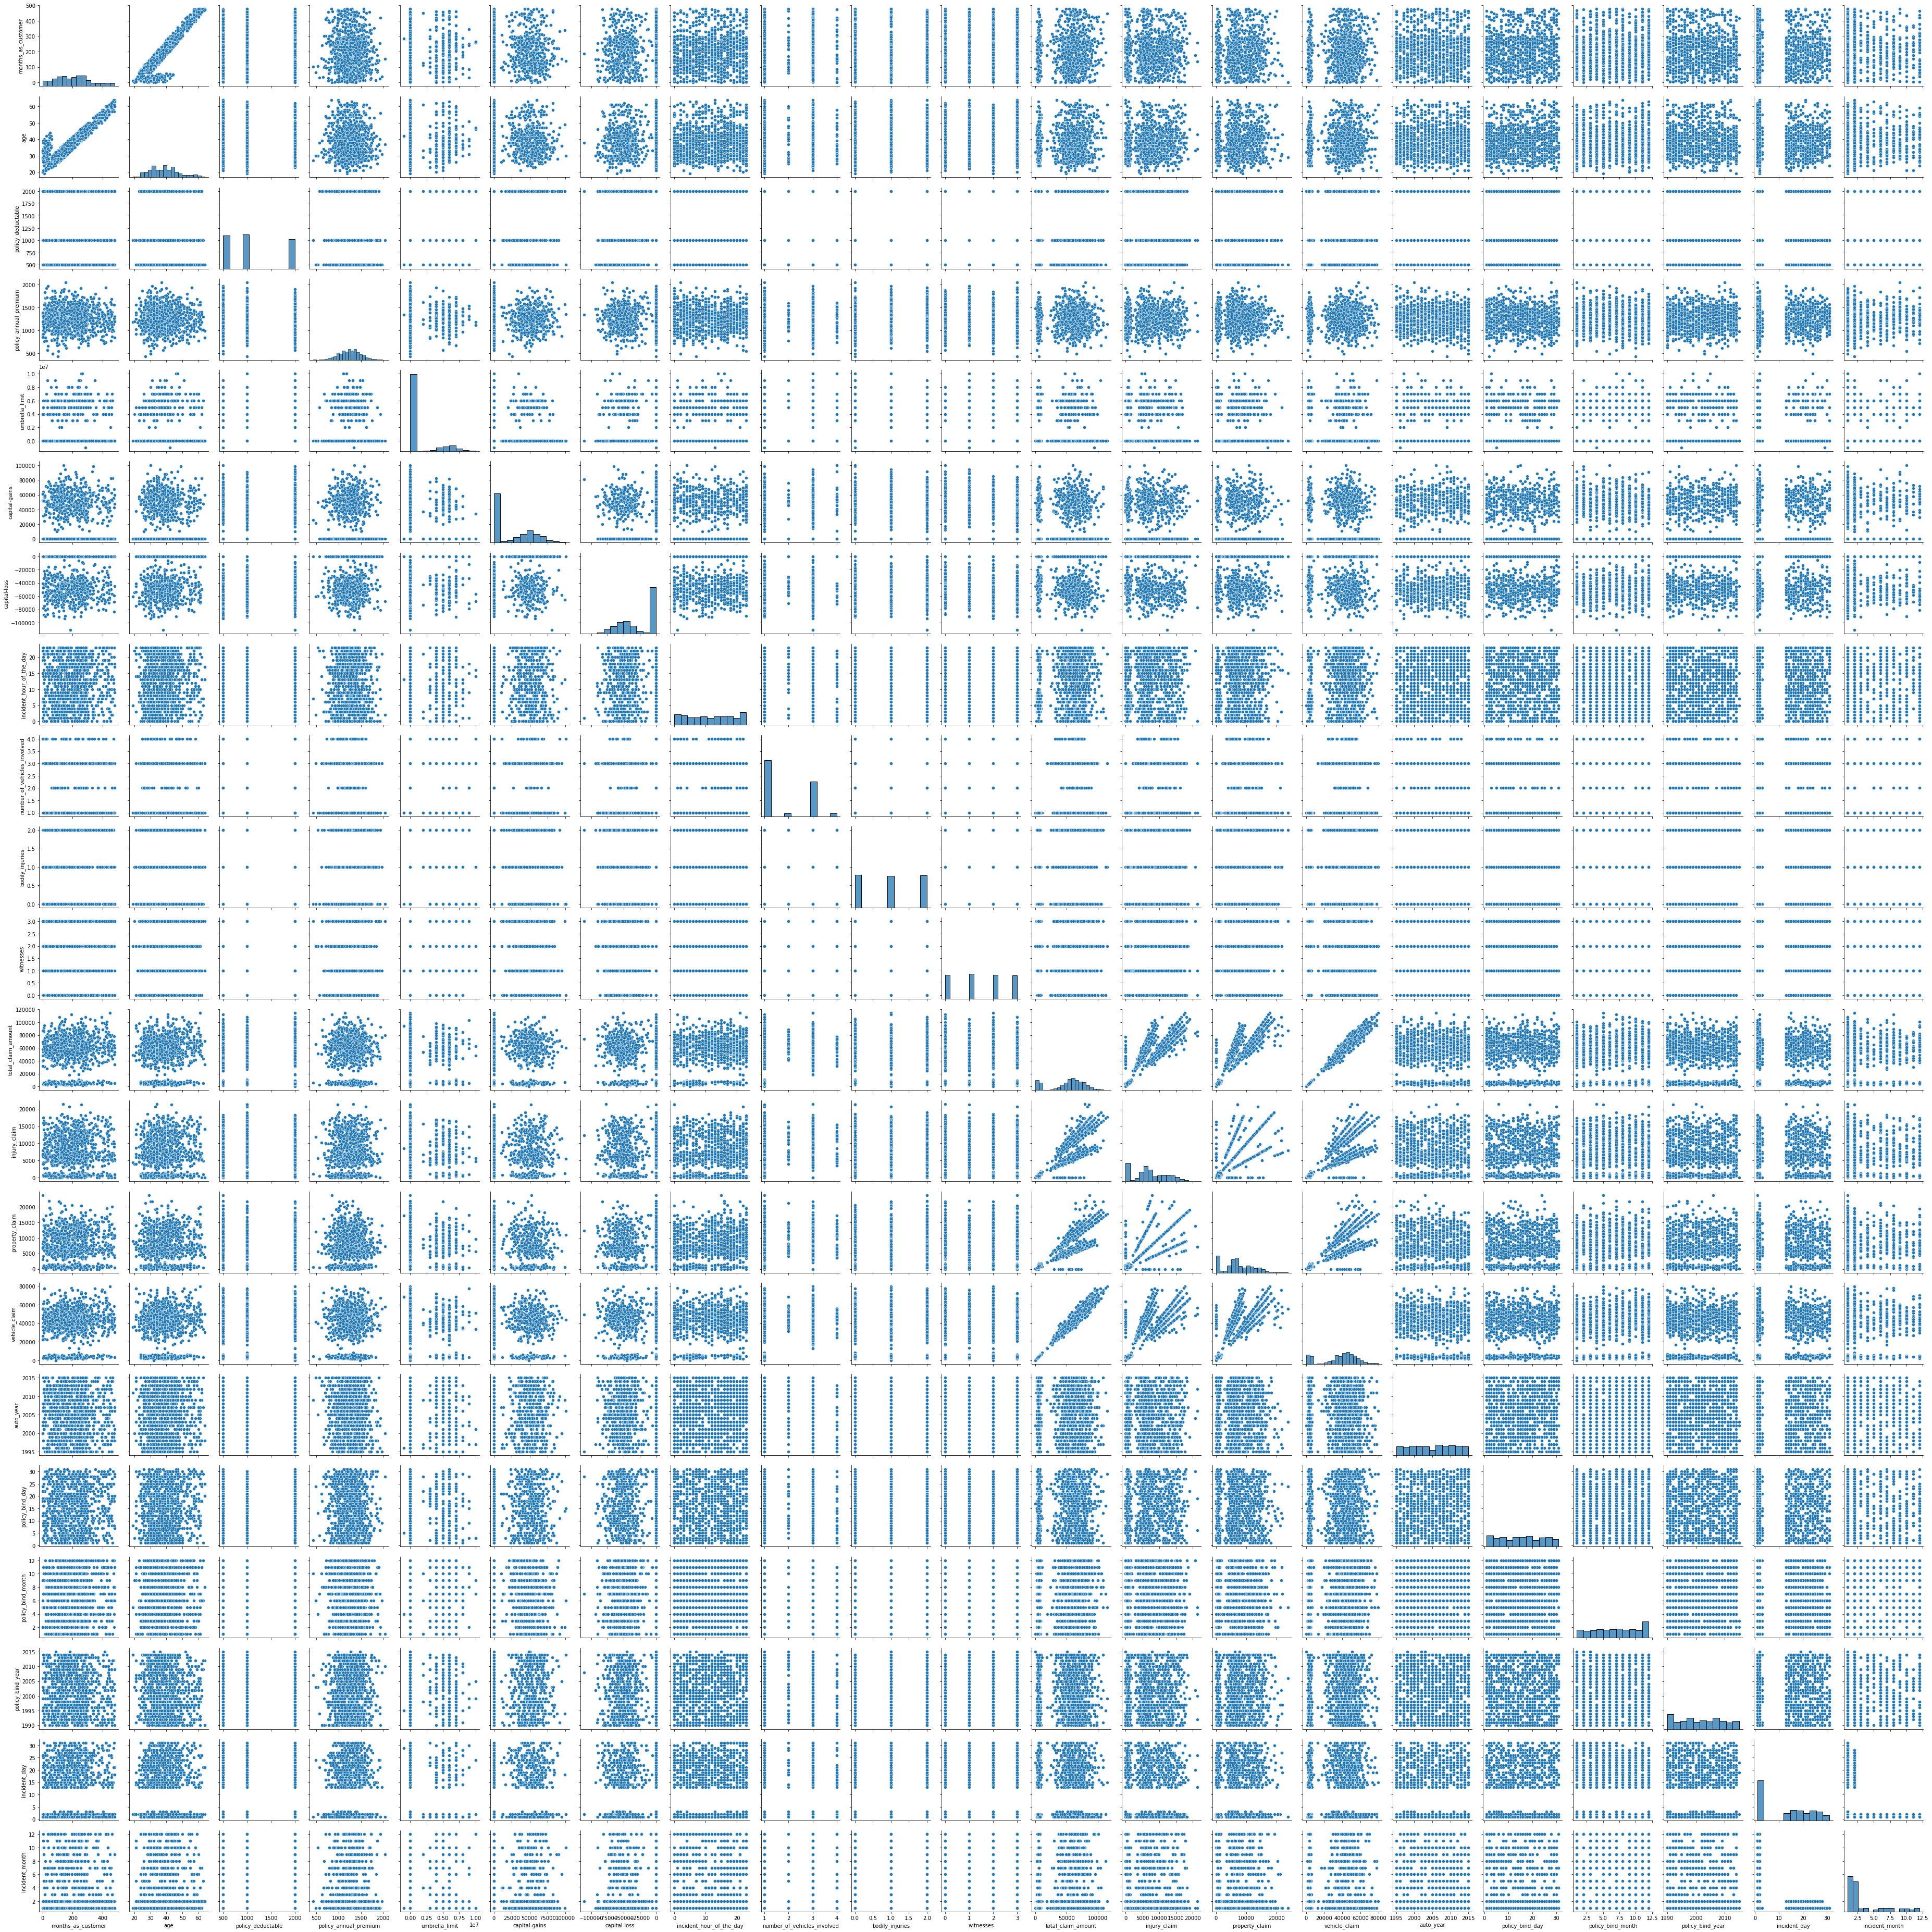

In [140]:
sns.pairplot(df)

# Label Encoder :

In [142]:
from sklearn import preprocessing

In [143]:
le = preprocessing.LabelEncoder()

In [144]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

In [145]:
df.head(10)

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   
5                 256   39             2               1000   
6                 137   34             1               1000   
7                 165   37             0               1000   
8                  27   33             0                500   
9                 212   42             0                500   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   
5                1351.10               0            0   
6                1333.35               0            1   
7                1137.03               0            1   
8                1442.99               0            0   
9                1315.68               0            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   
5                        6                  12                3   
6                        6                   9                2   
7                        0                  12                0   
8                        6                   7                9   
9                        6                   8                4   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   
5                     4              0             0              0   
6                     0              0        -77000              0   
7                     4              0             0              0   
8                     3              0             0              2   
9                     5              0        -39300              2   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   
5               1                  0                      1               4   
6               0                  1                      4               1   
7               0                  2                      4               5   
8               0                  2                      4               6   
9               1                  2                      3               0   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                        

_So all the features are converted into numeric form._

In [146]:
# Checking various factors of the dataset

df.describe(include='all').T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_state                 1000.0  1.014000e+00  8.309600e-01        0.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_sex                  1000.0  4.630000e-01  4.988786e-01        0.00   
insured_education_level      1000.0  2.966000e+00  1.948497e+00        0.00   
insured_occupation           1000.0  6.653000e+00  4.019048e+00        0.00   
insured_hobbies              1000.0  9.731000e+00  5.674049e+00        0.00   
insured_relationship         1000.0  2.416000e+00  1.681003e+00        0.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_type                1000.0  1.172000e+00  1.081474e+00        0.00   
collision_type               1000.0  1.022000e+00  7.280426e-01        0.00   
incident_severity            1000.0  1.184000e+00  9.396952e-01        0.00   
authorities_contacted        1000.0  2.167000e+00  1.532142e+00        0.00   
incident_state               1000.0  3.242000e+00  2.155942e+00        0.00   
incident_city                1000.0  2.966000e+00  2.044266e+00        0.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
property_damage              1000.0  3.020000e-01  4.593550e-01        0.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
police_report_available      1000.0  3.140000e-01  4.643486e-01        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_make                    1000.0  6.546000e+00  4.034869e+00        0.00   
auto_model                   1000.0  1.931800e+01  1.113611e+01        0.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
fraud_reported               1000.0  2.470000e-01  4.314825e-01        0.00   
policy_bind_day              1000.0  1.544800e+01  8.850176e+00        1.00   
policy_bind_month            1000.0  6.559000e+00  3.391758e+00        1.00   
policy_bind_year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_day                 1000.0  1.308400e+01  1.044318e+01        1.00   
incident_month               1000.0  3.407000e+00  3.276291e+00        1.00   

                                    25%      50%        75%          max  
months_as_customer             115.7500    199.5    276.250       479.00  
age                             32.0000     38.0     44.000        64.00  
policy_state                     0.0000      1.0      2.000         2.00  
policy_deductable              500.0000   1000.0   2000.000      2000.00  
policy_annual_premium         1089.6075   1257.2   1415.695      2047.59  
umbrella_limit                   0.0000      0.0      0.000  10000000.00  
insured_sex                      0.0000      0.0      1.000         1.00  
insured_education_level          1.0000      3.0      5.000         6.00  
insured_occupation               3.0000      7.0     10.000        13.00  
insured_hobbies                  5.0000     10.0     15.000        19.00  
insured_relationship             1.0000      2.0      4.000         5.00  
capital-gains                    0.0000      0.0

__Observations :__

1. All of the feature count is same 1000, hence no missing values.
2. Huge difference between mean and median of some features, which indicates skewed data.
3. Much outliers are present due to huge differences between the 75th percentile and the max value.

In [147]:
# Checking Skewness of the dataset

df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observation :__
    
    incident_month, fraud_reported, umbrella_limit are slightly skewed.

# Detecting Outliers :

months_as_customer                AxesSubplot(0.125,0.799681;0.133621x0.0803191)
age                            AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
policy_state                    AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
policy_deductable              AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
policy_annual_premium          AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
umbrella_limit                    AxesSubplot(0.125,0.703298;0.133621x0.0803191)
insured_sex                    AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
insured_education_level         AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
insured_occupation             AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
insured_hobbies                AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
insured_relationship              AxesSubplot(0.125,0.606915;0.133621x0.0803191)
capital-gains                  AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
capital-loss                

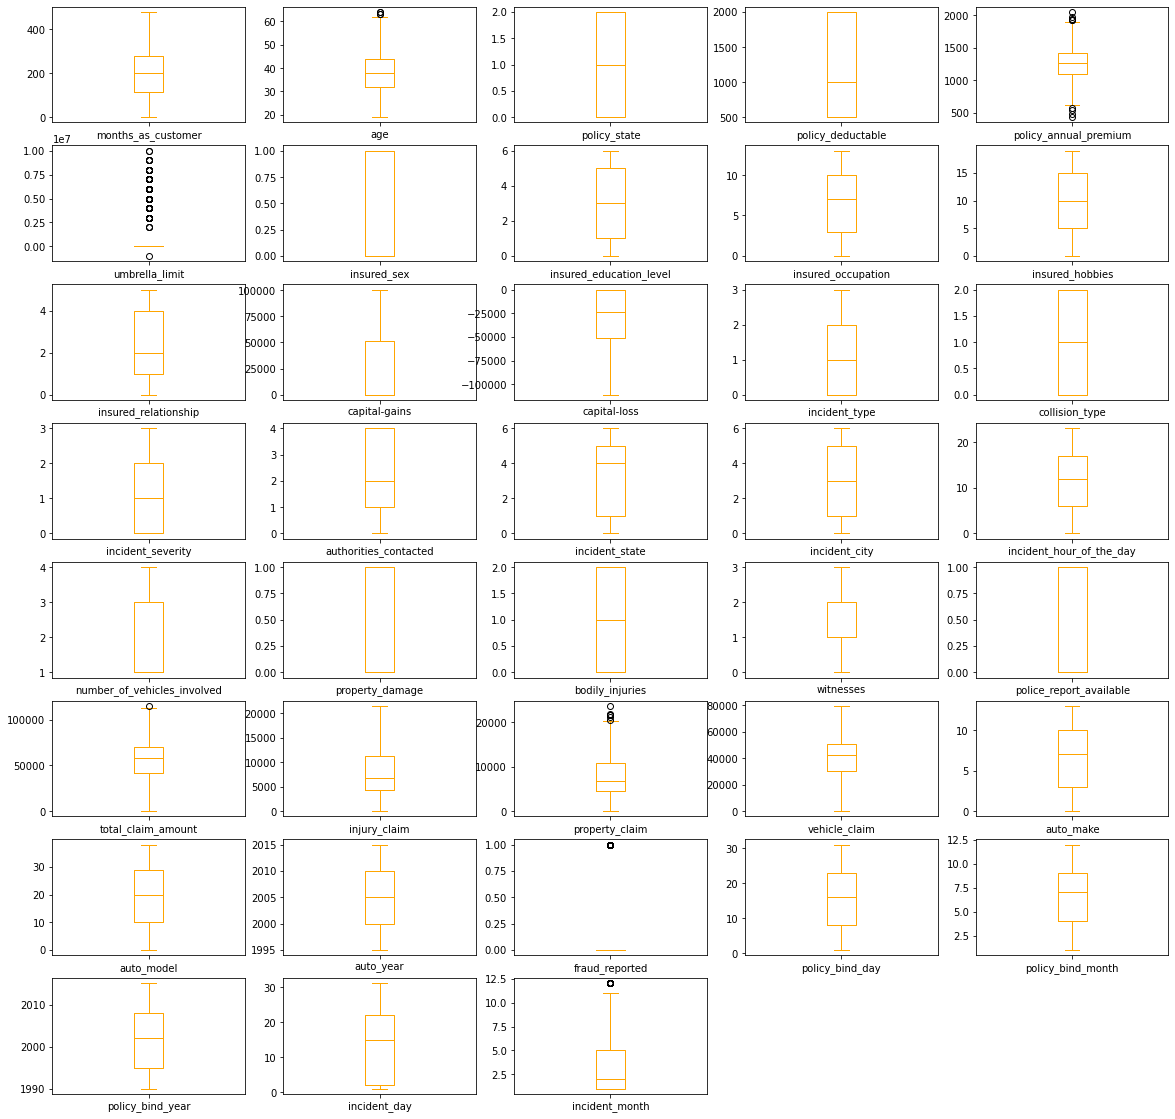

In [149]:
df.plot(kind='box', subplots=True, layout=(8,5), figsize=(20,20), color='orange')

Lots of outliers can be observed, and needs to be removed as well.

In [150]:
# Importing required zscore library

from scipy.stats import zscore

In [152]:
import numpy as np

In [153]:
z=np.abs(zscore(df))

In [154]:
threshold=3

In [155]:
df_new=df[(z<3).all(axis=1)] 

In [156]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (1000, 38)


In [157]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (980, 38)


In [158]:
# Data loss percentage

loss=((1000-980)/1000)*100
print('Data loss percentage ',loss)

Data loss percentage  2.0


Here we can see the difference between our original df shape and df_new shape, and the percentage of data loss. Much of the outliers are removed with 2% and we can't afford to lose more data and will proceed further with these values.

In [159]:
df=df_new
df.shape

(980, 38)

# Classification models :

In [161]:
# Data part

x=df.drop(['fraud_reported'],axis=1)
x.head(1)

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   

   auto_model  auto_year  policy_bind_day  policy_bind_month  \
0           1       2004               17                 10   

   policy_bind_year  incident_day  incident_month  
0              2014            25               1

In [162]:
# Target

y=df.fraud_reported
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

# Variance Inflation Factor :
__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

In [163]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [164]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [165]:
vif_calc()

      VIF Factor                     Features
0   2.860802e+01           months_as_customer
1   1.316274e+02                          age
2   2.604078e+00                 policy_state
3   4.677558e+00            policy_deductable
4   2.910897e+01        policy_annual_premium
5   1.267681e+00               umbrella_limit
6   1.919968e+00                  insured_sex
7   3.445445e+00      insured_education_level
8   3.794610e+00           insured_occupation
9   4.118337e+00              insured_hobbies
10  3.224961e+00         insured_relationship
11  1.890201e+00                capital-gains
12  1.983235e+00                 capital-loss
13  1.123728e+01                incident_type
14  3.110863e+00               collision_type
15  3.099402e+00            incident_severity
16  3.232657e+00        authorities_contacted
17  3.416320e+00               incident_state
18  3.236380e+00                incident_city
19  4.178128e+00     incident_hour_of_the_day
20  2.178839e+01  number_of_vehicl

There are no high multi colinearity values.

# Feature Scaling :
__<font color=orange>To transform the dataset into same format, so that we have a uniform dataset.</font>__

In [167]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [168]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

months_as_customer       age  policy_state  policy_deductable  \
0            1.069568  0.983352      1.179821          -0.224643   
1            0.202726  0.329711     -0.024580           1.412161   
2           -0.612105 -1.086511      1.179821           1.412161   
3            0.445442  0.220771     -1.228980           1.412161   
4            0.202726  0.547591     -1.228980          -0.224643   
5            0.445442  0.002890      1.179821          -0.224643   
6           -0.586100 -0.541810     -0.024580          -0.224643   
7           -0.343384 -0.214990     -1.228980          -0.224643   
8           -1.539626 -0.650751     -1.228980          -1.043045   
9            0.064031  0.329711     -1.228980          -1.043045   

   policy_annual_premium  umbrella_limit  insured_sex  \
0               0.620031       -0.467878     1.071971   
1              -0.248448        1.890767     1.071971   
2               0.645834        1.890767    -0.932861   
3               0.656603        2.362496    -0.932861   
4               1.353117        2.362496     1.071971   
5               0.388881       -0.467878    -0.932861   
6               0.315366       -0.467878     1.071971   
7              -0.497738       -0.467878     1.071971   
8               0.769465       -0.467878    -0.932861   
9               0.242181       -0.467878     1.071971   

   insured_education_level  insured_occupation  insured_hobbies  \
0                 0.532901           -1.156087         1.275279   
1                 0.532901           -0.160292         0.923775   
2                 1.556905            1.084451        -1.361003   
3                 1.556905           -1.405036        -1.361003   
4                -1.515109            1.084451        -1.361003   
5                 1.556905            1.333400        -1.185251   
6                 1.556905            0.586554        -1.361003   
7                -1.515109            1.333400        -1.712507   
8                 1.556905            0.088656        -0.130738   
9                 1.556905            0.337605        -1.009498   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0             -1.437247       1.003849      0.955432       0.761515   
1             -0.248136      -0.906228      0.955432       1.687428   
2              0.346420       0.351628      0.955432      -1.090309   
3              0.940975       0.846169     -1.278119       0.761515   
4              0.940975       1.458971     -0.691096       1.687428   
5              0.940975      -0.906228      0.955432      -1.090309   
6             -1.437247      -0.906228     -1.800713      -1.090309   
7              0.940975      -0.906228      0.955432      -1.090309   
8              0.346420      -0.906228      0.955432       0.761515   
9              1.535531      -0.906228     -0.451276       0.761515   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0        1.345272          -1.259947               1.198446        0.351070   
1       -0.029459          -0.195509               1.198446        0.814748   
2       -0.029459          -0.195509               1.198446       -1.039963   
3       -1.404189          -1.259947               1.198446       -0.576285   
4       -0.029459          -0.195509              -0.106529       -1.039963   
5       -0.029459          -1.259947              -0.759016        0.351070   
6       -1.404189          -0.195509               1.198446       -1.039963   
7       -1.404189           0.868929               1.198446        0.814748   
8       -1.404189           0.868929               1.198446        1.278426   
9       -0.029459           0.868929               0.545959       -1.503641   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      -0.973760                 -0.960633                    -0.820087   
1       0.990800                 -0.529777                    -0.820087   
2      -0.9

# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [169]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [170]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

months_as_customer       age  policy_state  policy_deductable  \
0            1.067802  1.002227      1.186478          -0.006669   
1            0.288076  0.432189     -0.039963           1.311321   
2           -0.572003 -1.150659      1.186478           1.311321   
3            0.517292  0.329335     -1.221785           1.311321   
4            0.288076  0.630325     -1.221785          -0.006669   

   policy_annual_premium  umbrella_limit  insured_sex  \
0               0.623228       -0.469512     1.071971   
1              -0.243135        2.040053     1.071971   
2               0.648825        2.040053    -0.932861   
3               0.659506        2.056901    -0.932861   
4               1.348203        2.056901     1.071971   

   insured_education_level  insured_occupation  insured_hobbies  \
0                 0.534498           -1.149301         1.290876   
1                 0.534498           -0.180669         0.922597   
2                 1.553800            1.089868        -1.343638   
3                 1.553800           -1.386859        -1.343638   
4                -1.518000            1.089868        -1.343638   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0             -1.467602       1.058757      0.991431       0.771088   
1             -0.222733      -0.945340      0.991431       1.652672   
2              0.370378       0.565224      0.991431      -1.096374   
3              0.943650       0.949867     -1.232825       0.771088   
4              0.943650       1.345955     -0.796006       1.652672   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0        1.350690          -1.331604               1.226631        0.282378   
1       -0.035833          -0.116757               1.226631        0.797359   
2       -0.035833          -0.116757               1.226631       -1.039232   
3       -1.398263          -1.331604               1.226631       -0.630774   
4       -0.035833          -0.116757              -0.158733       -1.039232   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0      -0.974268                 -0.961256                    -0.836889   
1       0.990683                 -0.539922                    -0.836889   
2      -0.974268                 -0.680845                     1.187947   
3      -1.484981                 -0.961256                    -0.836889   
4      -1.484981                  1.200763                    -0.836889   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0         1.512809         0.003892   0.474519                 1.473608   
1        -0.661022        -1.222318  -1.341431                -0.678606   
2        -0.661022         1.225925   1.357453                -0.678606   
3        -0.661022         0.003892   0.474519                -0.678606   
4        -0.661022        -1.222318  -0.424928                -0.678606   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0            0.691179     -0.115185        1.156154       0.739993   0.849826   
1           -1.593142     -1.447715       -1.490399      -1.597205   0.346314   
2           -0.788663      0.133522       -0.716158      -0.874742  -0.643893   
3            0.293734     -0.151677       -0.137863       0.642092  -0.888226   
4           -1.558182     -1.319348       -1.524457      -1.562547  -1.616056   

   auto_model  auto_year  policy_bind_day  policy_bind_month  \
0   -1.600589  -0.207403         0.184052           1.014287   
1   -0.666934   0.293321         1.301905          -0.170820   
2    0.967111   0.293321        -0.728525          -0.170820   
3    1.348631   1.497825         1.079812          -0.463043   
4    1.062024   0.633157        -1.074534          -0.170820   

   policy_bind_year  incident_day  incident_month  
0          1.649233      1.140912       -1.033338  
1          0.613581      0.761079       -1.033338  
2         -0.191

In [173]:
# Rechecking skew

df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


In [176]:
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])
df['fraud_reported']=np.sqrt(df['fraud_reported'])
df['incident_month']=np.sqrt(df['incident_month'])

In [177]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.601085
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


Skewness reduced to some extend.

# SMOTE :
To balance the categorical imbalance in target.

In [178]:
from imblearn.over_sampling import SMOTE

In [179]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [180]:
y.value_counts()

0    740
1    740
Name: fraud_reported, dtype: int64

Hence the target is balanced, and now we can proceed with machine learning models

# Machine Learning Models :
Here we have a classification case, hence we'll go with Logistic Regression and various other classification models.

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score 

# Spliting dataframe and finding best random state :

In [182]:
lr=LogisticRegression()

In [183]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
# predicting the x_train so that we can cross check how well the model is performing    
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test, pred_test)*100, '\n\n')

At random state 54  The model performs very well
At random_state:- 54
Training accuracy_score is:- 75.33783783783784
Testing accuracy_score is:- 75.33783783783784 


At random state 75  The model performs very well
At random_state:- 75
Training accuracy_score is:- 75.67567567567568
Testing accuracy_score is:- 75.67567567567568 


At random state 204  The model performs very well
At random_state:- 204
Training accuracy_score is:- 76.4358108108108
Testing accuracy_score is:- 76.35135135135135 


At random state 270  The model performs very well
At random_state:- 270
Training accuracy_score is:- 74.66216216216216
Testing accuracy_score is:- 74.66216216216216 


At random state 355  The model performs very well
At random_state:- 355
Training accuracy_score is:- 74.74662162162163
Testing accuracy_score is:- 74.66216216216216 


At random state 421  The model performs very well
At random_state:- 421
Training accuracy_score is:- 76.35135135135135
Testing accuracy_score is:- 76.35135135135135 

So, we have found some of the good random state values with the help of Logistic Regression, and will select the one which gives highest accuracy.

204 random state with accuracy score 76

# Required Evaluation Metrices :

In [184]:
# Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=204)
# Here 20% will be used for testing purpose and rest 80% for training purpose.

In [185]:
# First we'll create list of all the classification models to be used

models=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        SVC(), # default kernel='rbf'
        SVC(kernel='poly')]

In [186]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7635135135135135
[[109  37]
 [ 33 117]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       146
           1       0.76      0.78      0.77       150

    accuracy                           0.76       296
   macro avg       0.76      0.76      0.76       296
weighted avg       0.76      0.76      0.76       296



Accuracy score of GaussianNB() is:
0.777027027027027
[[103  43]
 [ 23 127]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       146
           1       0.75      0.85      0.79       150

    accuracy                           0.78       296
   macro avg       0.78      0.78      0.78       296
weighted avg       0.78      0.78      0.78       296



Accuracy score of DecisionTreeClassifier() is:
0.8175675675675675
[[120  26]
 [ 28 122]]
              precision    recall  f1-score   support

           0       0.81      0.82    

# Ensemble Techniques :

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [188]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score of',rfc,'is:')
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

Accuracy score of RandomForestClassifier(random_state=42) is:
0.8547297297297297
[[124  22]
 [ 21 129]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       146
           1       0.85      0.86      0.86       150

    accuracy                           0.85       296
   macro avg       0.85      0.85      0.85       296
weighted avg       0.85      0.85      0.85       296



In [189]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
print('Accuracy score of',adc,'is:')
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

Accuracy score of AdaBoostClassifier() is:
0.8277027027027027
[[129  17]
 [ 34 116]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.87      0.77      0.82       150

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296



In [190]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print('Accuracy score of',gbc,'is:')
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

Accuracy score of GradientBoostingClassifier() is:
0.8716216216216216
[[126  20]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       146
           1       0.87      0.88      0.87       150

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.87      0.87      0.87       296



So, from above all the models, we found the highest score :
    
   __Accuracy score of GradientBoostingClassifier() is: 0.8716216216216216__

# Cross validation score for GradientBoostingClassifier() :

In [191]:
gbc=GradientBoostingClassifier(n_estimators=100,random_state=42)
gbc.fit(x_train,y_train)
gbc.score(x_train, y_train)
predgbc=gbc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
for i in range(2,20):
    cross=cross_val_score(gbc,x,y,cv=i)
    cvs=cross.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",cvs*100 )
    print('Accuracy score is:', acc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 82.02702702702702
Accuracy score is: 85.47297297297297


At cv:- 3
Cross validation score is:- 79.40697429327727
Accuracy score is: 85.47297297297297


At cv:- 4
Cross validation score is:- 86.28378378378379
Accuracy score is: 85.47297297297297


At cv:- 5
Cross validation score is:- 87.43243243243244
Accuracy score is: 85.47297297297297


At cv:- 6
Cross validation score is:- 87.23846044128459
Accuracy score is: 85.47297297297297


At cv:- 7
Cross validation score is:- 88.32251759686258
Accuracy score is: 85.47297297297297


At cv:- 8
Cross validation score is:- 87.97297297297297
Accuracy score is: 85.47297297297297


At cv:- 9
Cross validation score is:- 87.51580849141824
Accuracy score is: 85.47297297297297


At cv:- 10
Cross validation score is:- 88.10810810810811
Accuracy score is: 85.47297297297297


At cv:- 11
Cross validation score is:- 87.31192522237298
Accuracy score is: 85.47297297297297


At cv:- 12
Cross validation score is:- 87.721828

At cv=4 Cross val score and Accuracy Score are close, that is model is perfoming well.

In [192]:
score_selected= cross_val_score(rfc,x,y,cv=4).mean()
print ("The cv score is: ", score_selected, "\nThe accuracy score is: ",acc)

The cv score is:  0.8709459459459459 
The accuracy score is:  0.8547297297297297


# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of GradientBoostingClassifier()

In [ ]:
GradientBoostingClassifier(loss={'deviance', 'exponential'},
                          n_estimators=100,
                          criterion={'friedman_mse', 'squared_error', 'mse', 'mae'},
                          max_features={'auto', 'sqrt', 'log2'})

These are the some of the parameters for GradientBoostingClassifier(), which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [194]:
params={'n_estimators':[100],
        'loss':['deviance', 'exponential'],
        'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
        'max_features':['auto', 'sqrt', 'log2']}

In [195]:
grid=GridSearchCV(GradientBoostingClassifier(), params, cv=4)

In [196]:
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [197]:
grid.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_features': 'auto',
 'n_estimators': 100}

So here we have found the best parameters for our model, and now we can finally train our model.

In [199]:
GBC=GradientBoostingClassifier(loss='deviance',
                          n_estimators=100,
                          criterion='friedman_mse',
                          max_features='auto')

In [200]:
GBC.fit(x_train,y_train)
GBC.score(x_train, y_train)
pred=GBC.predict(x_test)
print('Accuracy score of',GBC,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
print('\n')

Accuracy score of GradientBoostingClassifier(max_features='auto') is:
0.8716216216216216
[[126  20]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       146
           1       0.87      0.88      0.87       150

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.87      0.87      0.87       296





__<font color=orange>So, this is the best model that we have achieved.</font>__

# AUC ROC Curve :

In [202]:
pred_prob=GBC.predict_proba(x_test)

In [203]:
fpr={} 
tpr={} 
thresh={} 
n_class=2

In [204]:
for i in range(n_class): 
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i) 

In [205]:
import random 
color=['blue','green','red'] 

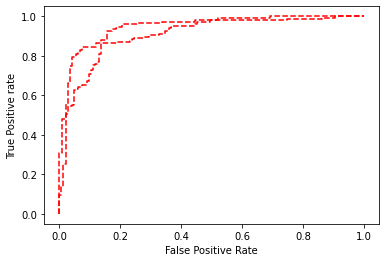

In [206]:
for i in range(n_class): 
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color)) 
 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.savefig('Multiclass ROC',dpi=300);

# Saving the best model :

In [208]:
import pickle
filename='Insurance.pkl'
pickle.dump(GBC,open(filename,'wb'))

# Predictions :

In [209]:
predictions=GBC.predict(x_test)

In [210]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [211]:
pd.DataFrame([predictions[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0            0         0
1            0         0
2            1         1
3            0         0
4            0         0
..         ...       ...
291          1         1
292          1         1
293          1         1
294          0         0
295          0         0

[296 rows x 2 columns]

Hence these are the predicted and original fraud_reported values in a dataframe.

# __<font color='orange'>THANK YOU.</font>__